## DELIVERABLE DESCRIPTION

In this google colab file is presented the deliverable to complete.

This is an approach about how to monitor a robot and its surroundings using computer vision. The objective is to detect a person, a robot and smoke present in a video using different computer vision techniques.

The delivery submission is individual. You can use the internet to find the functions needed.

Upload this **sheet** completed and **output.mp4** video to **Submissions** folder by 20/02/2025.

Don’t hesitate to ask if you have any doubts!

**Before starting**

Upload **video.mp4** extracted from **materials** to **Files** on the left.

## LIBRARIES AND VARIABLES

In [ ]:
# Install ultralytics
!pip install ultralytics==8.2.103 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.9 MB/s eta 0:00:00


In [ ]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO
from google.colab import files
from IPython.display import display, clear_output, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Video path
video_path = "video.mp4"

## PREDEFINED FUNCTIONS

In [ ]:
# Show an image in rgb or grayscale with plt
def show_image(frame):
    plt.figure(figsize=(10, 10))

    # Convert BGR to RGB if the image has 3 channels
    if len(frame.shape) == 3 and frame.shape[2] == 3:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame)
    else:
        # Display grayscale images properly
        plt.imshow(frame, cmap="gray")

    plt.axis("off")  # Hide axis for better visualization
    plt.show()

In [ ]:
# Extract a specific frame selected from a video
def extract_frame(frame_number):

  cap = cv2.VideoCapture(video_path)
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
  ret, frame = cap.read()

  if not ret:
      print("The frame couldn't be extracted.")
  cap.release()

  return frame

In [ ]:
# Crop an image to have a clean visualization of the robot
def crop_frame(frame):
    x1, x2, y1, y2 = 500, 840, 120, 680
    img_robot = frame[y1:y2, x1:x2]
    return img_robot

### Extract data from functions

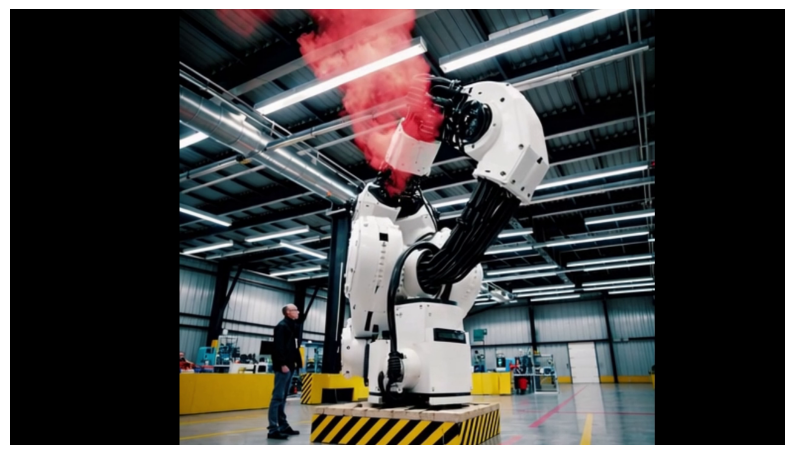

In [ ]:
# Get a frame with smoke
frame_number = 450
frame_smoke = extract_frame(frame_number)
show_image(frame_smoke)

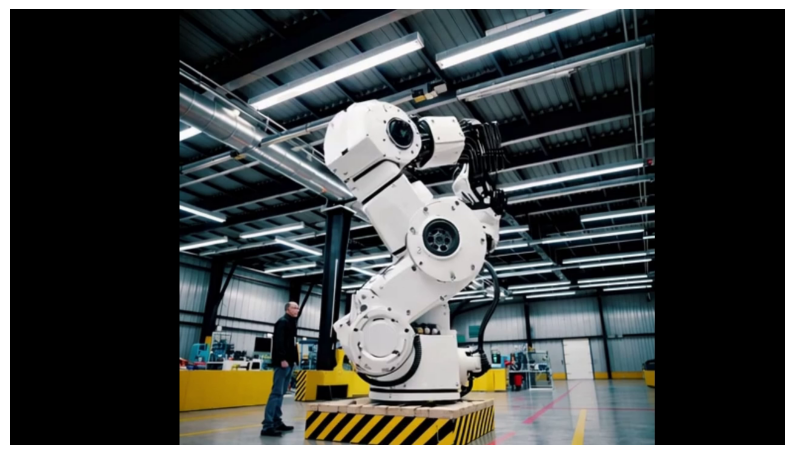

In [ ]:
# Get a frame without smoke
frame_number = 0
frame_person = extract_frame(frame_number)
show_image(frame_person)

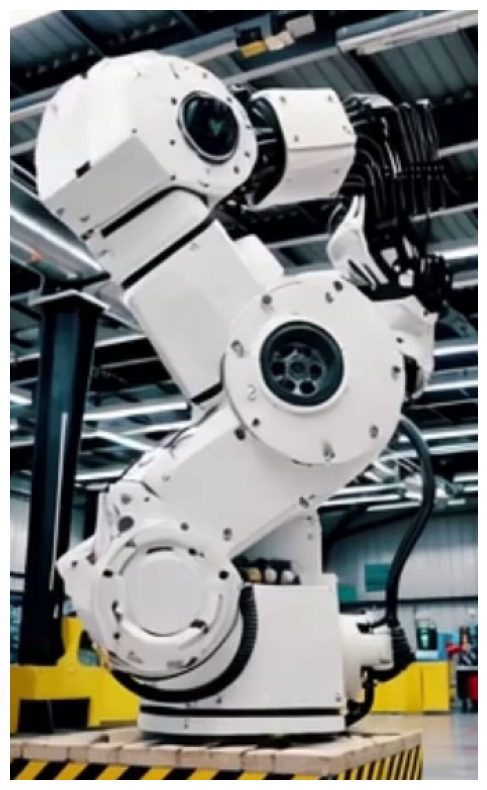

In [ ]:
# Get a frame with the robot (copy of frame_person)
frame_robot = frame_person.copy()

# Crop the image of the robot
img_robot = crop_frame(frame_robot)
show_image(img_robot)

## FUNCTIONS TO COMPLETE

### Smoke detection

We will use red color detection to identify the smoke emitted by the robot. Following the same principle as in the exercises, you can analyze the HSV template to determine which red values fall within the defined limits. Since red appears in two separate regions of the HSV spectrum, we will define two detection ranges and then merge both masks to ensure complete detection.

Use the [HSV TEMPLATE](https://static.packt-cdn.com/products/9781789537147/graphics/assets/9f6c1be4-f654-4d28-b476-a2e327920de6.png) for the color detection.

In [ ]:
# USE RED COLOR DETECTION TO DETECT THE SMOKE IN THE IMAGE
def detect_smoke(frame, testing=False):
    # Convert the frame to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define red color ranges in HSV (we will use 2 color ranges for red)
    lower_red1 = np.array([0, 80, 0])   # Red color range with lower H
    upper_red1 = np.array([ 170, 100, 255])

    lower_red2 = np.array([170, 0, 20])
    upper_red2 = np.array([80, 255, 255])

    # Create masks to detect red in both ranges
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)


    # Combine both masks using bitwise or
    mask = mask1 + mask2

    # Apply morphological operations to reduce noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15)) # Create an ellipse kernel with size (15,15)
    mask_eroded =  cv2.erode(mask, kernel, iterations=1) # Erosion of the mask, iterations=1
    mask = cv2.dilate(mask_eroded, kernel, iterations=5) # Dilation of the mask, iterations=5

    # Display masks if testing is enabled
    if testing:
        show_image(mask1)
        show_image(mask2)
        show_image(mask_eroded)
        show_image(mask)

    return mask

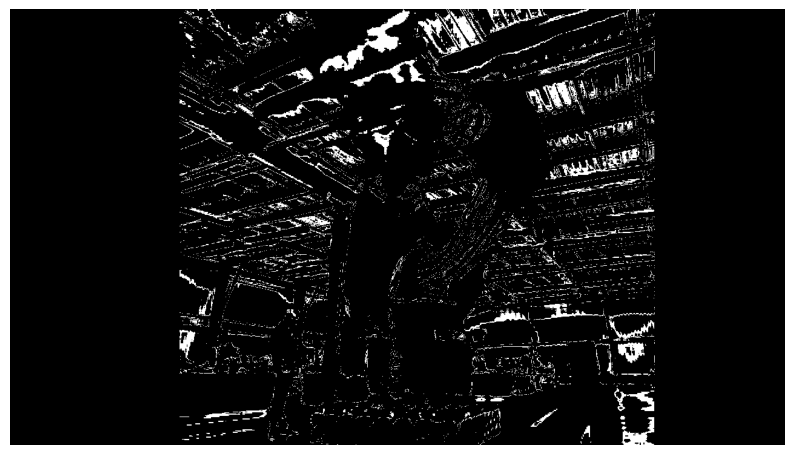

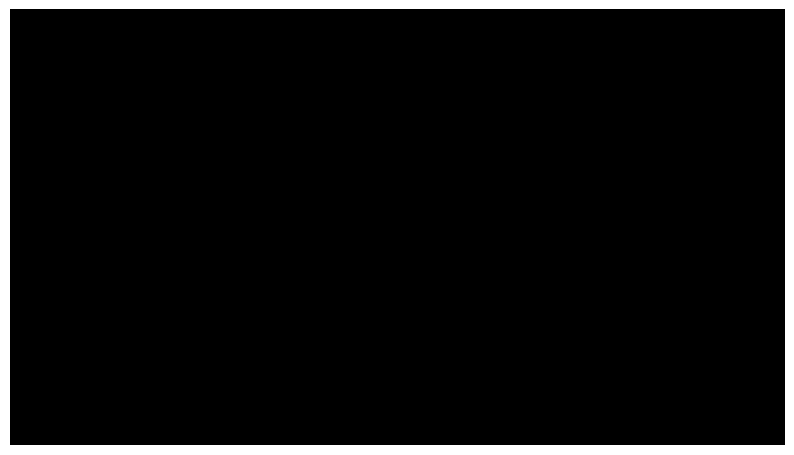

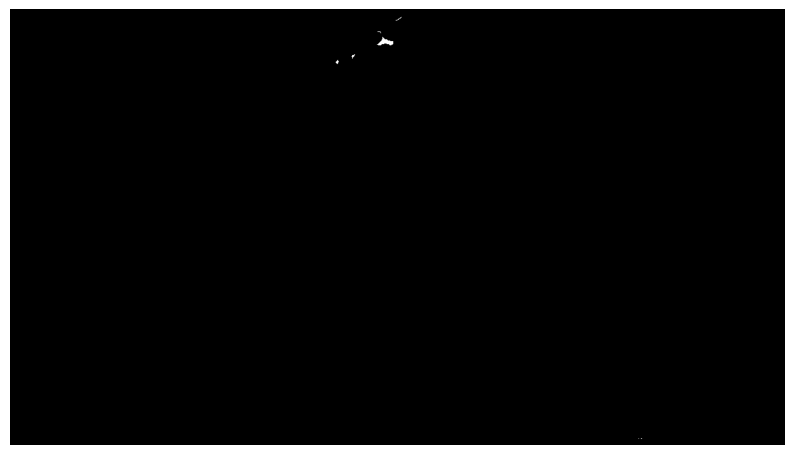

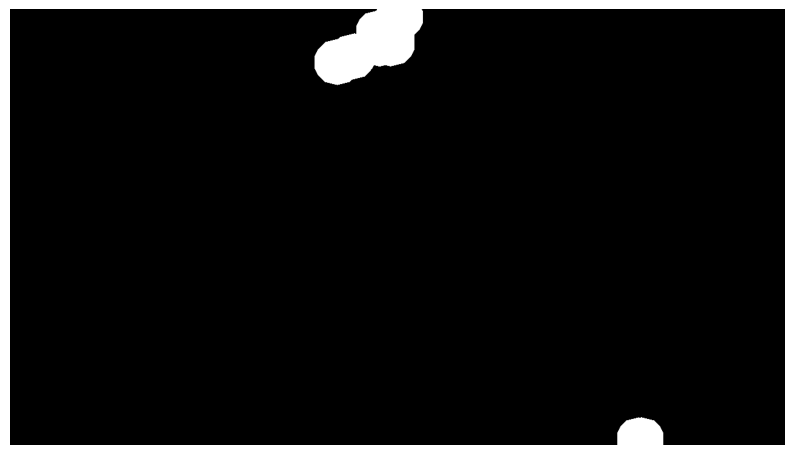

In [ ]:
# Test detect_smoke function
mask = detect_smoke(frame_smoke, True)

In [ ]:
# MARK SMOKE DETECTION IN FRAME WITH A BOUNDING BOX
def draw_smoke(frame, mask):
    # Find contours in the mask
    contours, hierarchy = cv2.findContours(mask.copy(),
                                           cv2.RETR_EXTERNAL,
                                           cv2.CHAIN_APPROX_SIMPLE)

    # Define the minimum area to consider a contour as smoke
    min_area = 500

    # Iterate through detected contours
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)


        if area > min_area:  # Filter only large contours
            # Get the minimum rotated bounding box
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.intp(box)  # Convert to integer

            # Draw the minimum bounding box on the frame
            cv2.drawContours(frame, [box], 0, (0, 400, 0), 2) # cv2.drawContours

            # Get the center of the rectangle
            (cx, cy), (w, h), angle = rect
            cx, cy = int(cx), int(cy)

            # Add the label "Smoke" at the center of the rectangle
            label = "Smoke"
            cv2.putText(frame, label, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame

2852.0
13731.5


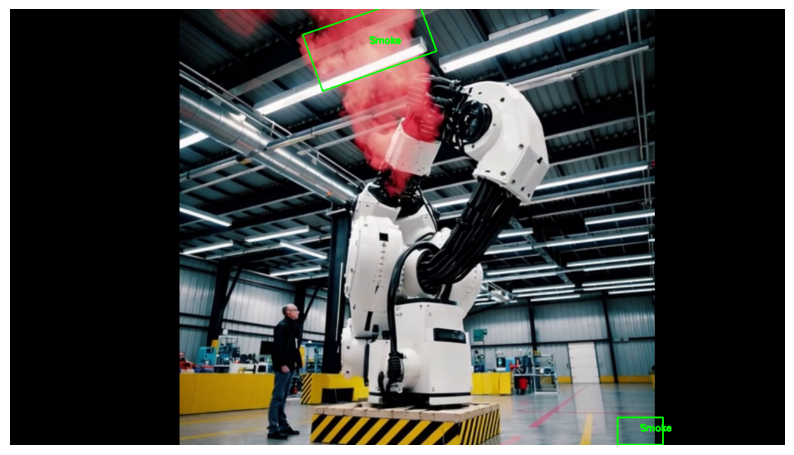

In [ ]:
# Test draw_smoke function
frame = draw_smoke(frame_smoke, mask)
show_image(frame)

### People detection

We will use the YOLO model to detect people in the video frame. Since YOLO can detect multiple classes, we will filter the detections to keep only the "person" class with a confidence score greater than 60%.

Next, we will create a function to draw the bounding box around the detected person. This function will take the frame and detection information as input and overlay a rectangle around the person to visualize the detection.

In [ ]:
# Load yolo model
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 108MB/s]


In [ ]:
# DETECT PEOPLE IN THE VIDEO WITH YOLO
def detect_people(frame, model):
    conf_threshold = 0.6
    # Perform prediction with the model
    results = model.predict(frame)

    # Access the detected bounding boxes
    boxes = results[0].boxes

    # Filter detections for people (class 0) with confidence > 0.6
    detections = []
    for r in results:
        # r.boxes is a list of 'Box' objects
        for box in r.boxes:
            cls_id = int(box.cls[0])      # class index
            conf   = float(box.conf[0])   # confidence
            if cls_id == 0 and conf > conf_threshold:
                # class 0 is typically "person"
                detections.append(box)  # Keep only detections with confidence > 0.6

    return detections

In [ ]:
# MARK PEOPLE DETECTION IN FRAME WITH A BOUNDING BOX
def draw_people(frame, detections):
    for det in detections:
        # Get bounding box coordinates
        x1, y1, x2, y2 = det.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Get detection confidence
        conf = float(det.conf[0])

        # Person label with confidence score
        label = f"Person {conf:.2f}"

        # Draw a rectangle around the detected person
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Add the label above the bounding box
        text_x, text_y = x1, y1 - 5
        cv2.putText(frame, label, (text_x, text_y),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), 1, cv2.LINE_AA)

    return frame


0: 384x640 1 person, 1 airplane, 98.1ms
Speed: 2.5ms preprocess, 98.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


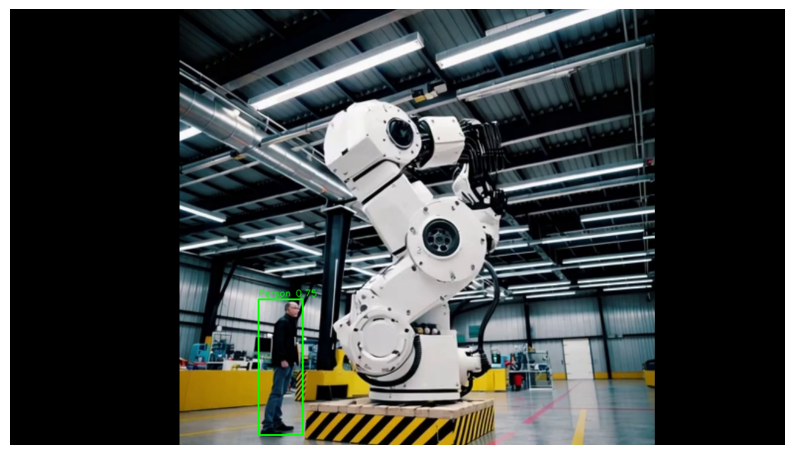

In [ ]:
# Test people detection
people_detections = detect_people(frame_person, model)
frame = draw_people(frame_person, people_detections)
show_image(frame)

### Robot detection

SIFT (Scale-Invariant Feature Transform) is an algorithm used to detect and describe key features in an image. It is robust to changes in scale, rotation, and lighting, making it ideal for object recognition tasks.

In this project, we will use SIFT to detect a robot in a video. We have extracted a cropped image of the robot (img_robot), which will be used to compute its key features. To match these features with the video frames, we will use a Brute-Force Matcher (BFMatcher), which compares descriptors to find the best matches between the robot image and the current frame.

Once the robot is detected, we will use draw_robot to draw a bounding box around it, helping visualize the detection in the video.

In [ ]:
sift = cv2.SIFT_create()  # Create SIFT feature detector and descriptor
bf = cv2.BFMatcher()  # Create a brute-force matcher for feature matching

In [ ]:
# DETECT ROBOT IN THE IMAGE USING SIFT
def detect_robot(frame, img_robot, sift, bf):
  M = None
  gray_robot = cv2.cvtColor(img_robot, cv2.COLOR_BGR2GRAY) # Convert img_robot image from BGR color to grayscale
  gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Convert frame image from BGR color to grayscale

  # Use sift to detect and compute the keypoints and descriptors
  kp1, des1 = sift.detectAndCompute(gray_robot, None) # Detect and computer keypoints for gray_robot
  kp2, des2 = sift.detectAndCompute(gray_frame, None) # Detect and computer keypoints for gray_frame

  img_matches = frame.copy()

  # Check if des2 is not None and not empty
  if des2 is not None and len(des2) > 0:
    # Find matches with bf
    matches = bf.knnMatch(des1, des2, k=2)

    # Filter best matches between images
    good_matches = []
    for m, n in matches:
      if m.distance < 0.7 * n.distance:
        good_matches.append(m)

    M = None
    annotated_frame = frame.copy()

    # Define min_match_count within the function scope
    min_match_count = 10

    if len(good_matches) >= min_match_count:
      # Draw good matches between images
      img_matches = cv2.drawMatches(
          img_robot, kp1,
          frame, kp2,
          good_matches, None,
          flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
      ) # cv2.drawMatches

      # Get matching keypoints
      src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
      dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

      # Calculate homography
      M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0) # cv2.findHomography

  # Return all three values: img_matches, M, and annotated_frame
  return img_matches, M, annotated_frame

In [ ]:
# DRAW A BOUNDING BOX AROUND THE ROBOT
def draw_robot(frame, M, gray_robot): # Add gray_robot as an argument
    # If there are enough matches
    if M is not None:
        h, w = gray_robot.shape
        corners = np.float32([[0,0], [0,h], [w,h], [w,0]]).reshape(-1,1,2)
        transformed_corners = cv2.perspectiveTransform(corners, M)


        # Define the four corners of the robot image
        pts = np.int32(transformed_corners)
        cv2.polylines(annotated_frame, [pts], isClosed=True,
                          color=(0, 255, 0), thickness=3, lineType=cv2.LINE_AA)
                # Transform the points to locate the robot in the video frame
        x_min = pts[:,0,0].min()
        y_min = pts[:,0,1].min()
        cv2.putText(annotated_frame, "Robot Detected", (x_min, y_min-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2, cv2.LINE_AA)

    return annotated_frame, M # Return annotated_frame instead of just frame

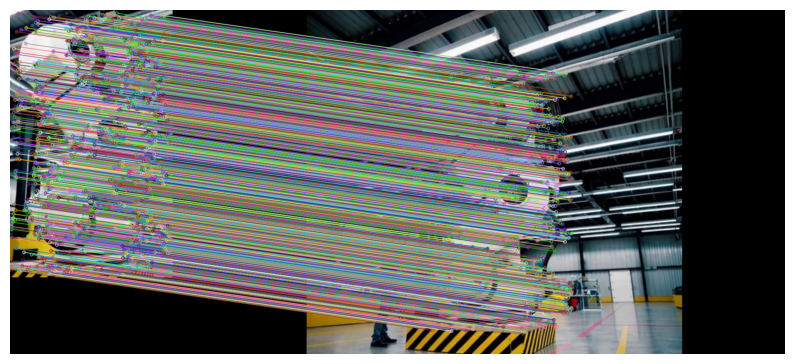

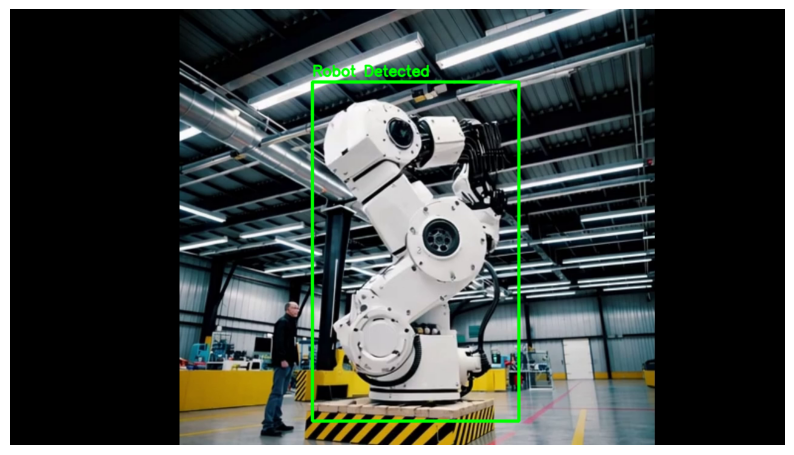

In [ ]:
# Test detect_robot function
img_matches, M, annotated_frame = detect_robot(frame_robot, img_robot, sift, bf)
show_image(img_matches)

# Draw robot detection
frame, m_returned = draw_robot(frame_robot, M, cv2.cvtColor(img_robot, cv2.COLOR_BGR2GRAY))  # Pass only frame_robot and M to draw_robot
show_image(frame)

## VIDEO ANALYSIS


This is the complete processing flow, where the entire video is analyzed while simultaneously detecting the person, the robot, and the smoke. The video with detections will be saved in **output.mp4**

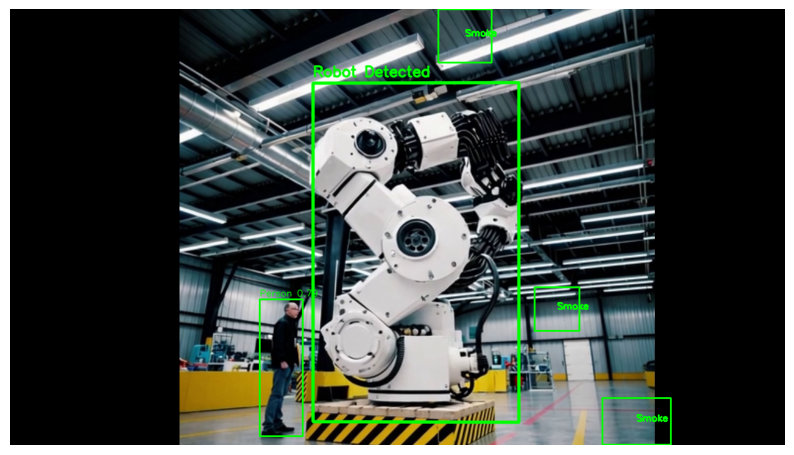

6072.5
6216.0

0: 384x640 1 person, 1 airplane, 103.1ms
Speed: 2.4ms preprocess, 103.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
# Open the video
cap = cv2.VideoCapture(video_path)

# Get properties of the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Create a VideoWriter to save the processed video with detections
output_path = "output.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read() # Read frame of the video
    if not ret:
        break

    # Detect smoke in the frame
    mask =  detect_smoke(frame, testing=False)  # Detect smoke (testing = False)
    frame = draw_smoke(frame, mask) # Draw bounding box detecting the smoke

    # Detect people in the frame
    people_detections =  detect_people(frame, model) # Detect people
    frame = draw_people(frame, people_detections) # Draw bounding box detecting people

    # Detect the robot in the frame
    img_matches, M, annotated_frame = detect_robot(frame, img_robot, sift, bf) # Detect robot
    frame, _ = draw_robot(frame, M, cv2.cvtColor(img_robot, cv2.COLOR_BGR2GRAY))
 # Draw bounding box detecting the robot

    # Display the processed frame
    clear_output(wait=True)
    show_image(frame)

    # Save the processed frame to the new video
    out.write(frame)

cap.release()
out.release()
print(f"Video saved as {output_path}")

In [ ]:
# Download the video automatically
files.download("output.mp4")